## A map of Intracellular Electrophysiology Data on DANDI

In my second year of undergrad, I took a cellular neurophysiology course knowing nothing about the topic or field. This course blew me away; the idea that you could record directly from single neurons and 'see' their inner workings was (and still is) incredible to me. This inspired what is now a almost a decade long academic journey, one where I learned the ups and downs of patch-clamp electrophysiology. 
I am happy to see the rise in open intracellular 

## Examining the data

Lets take a look at the overall embedding of the data. I 

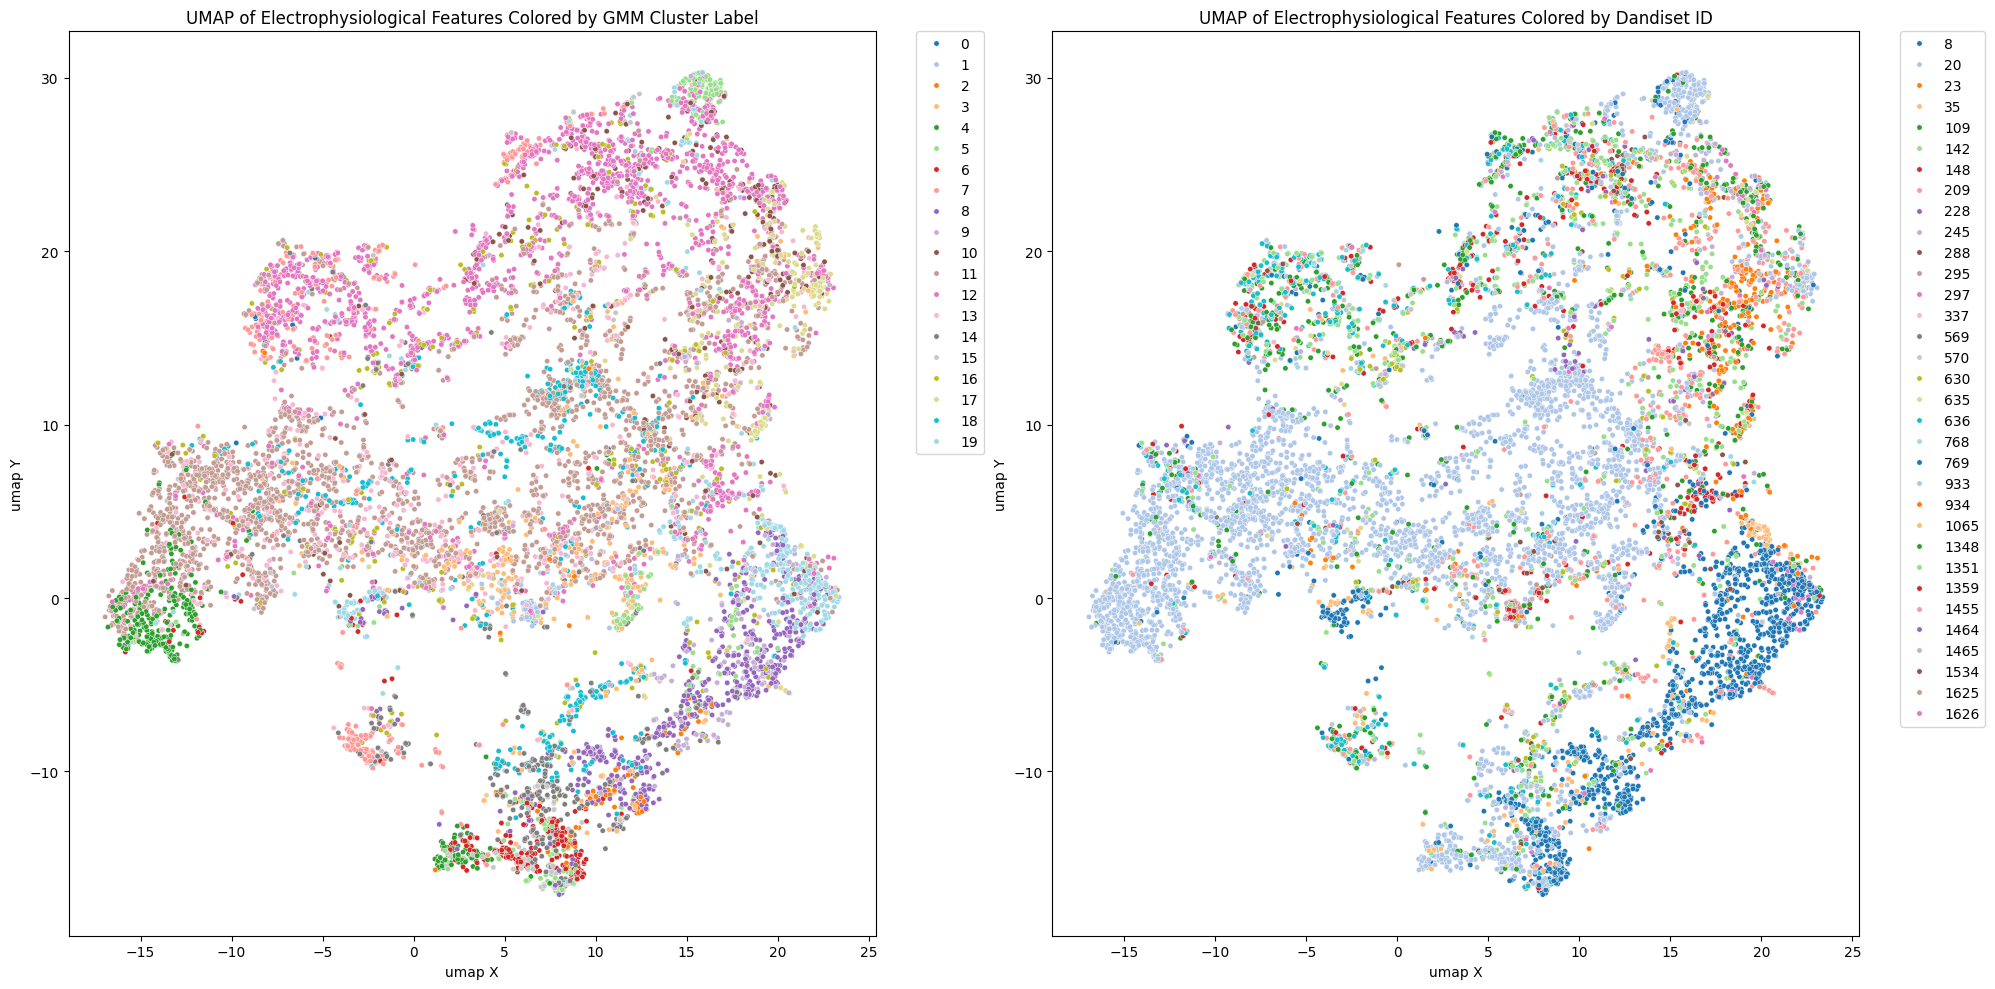

In [26]:
#load the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('all2.csv')
#plot a couple feature distributions
features_used = ['input_resistance', 'tau', 'v_baseline', 'sag_nearest_minus_100', 
       'ap_1_threshold_v_0_long_square', 'ap_1_peak_v_0_long_square',
       'ap_1_upstroke_0_long_square',# 'ap_1_downstroke_0_long_square',
       #'ap_1_upstroke_downstroke_ratio_0_long_square',
       'ap_1_width_0_long_square', 'ap_1_fast_trough_v_0_long_square',
       'ap_mean_threshold_v_0_long_square', 'ap_mean_peak_v_0_long_square',
       'ap_mean_upstroke_0_long_square', #'ap_mean_downstroke_0_long_square',
       #'ap_mean_upstroke_downstroke_ratio_0_long_square',
       'ap_mean_width_0_long_square', 'ap_mean_fast_trough_v_0_long_square',
       'avg_rate_0_long_square', 'latency_0_long_square',]
selected_features = ['input_resistance', 'tau',  'ap_1_width_0_long_square', 'sag_nearest_minus_100']

#display the umap plot
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.scatterplot(data=data, x='umap X', y='umap Y', hue='GMM cluster label', palette='tab20', s=15, ax=ax[0])
ax[0].set_title('UMAP of Electrophysiological Features Colored by GMM Cluster Label')
#move the legend outside the plot
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
sns.scatterplot(data=data, x='umap X', y='umap Y', hue='dandiset_id', palette='tab20', s=15, ax=ax[1])
ax[1].set_title('UMAP of Electrophysiological Features Colored by Dandiset ID')
#move the legend outside the plot
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


As a sanity check, we can look at how features map over a UMAP. Noteably, there is a lot of contriversy about (interpreting feature distributions on UMAPs)[https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1011288], but here we are just using it as a general sanity check to ensure the UMAP is embedding in a logical manner, and not explioting some sort of bias in the data.

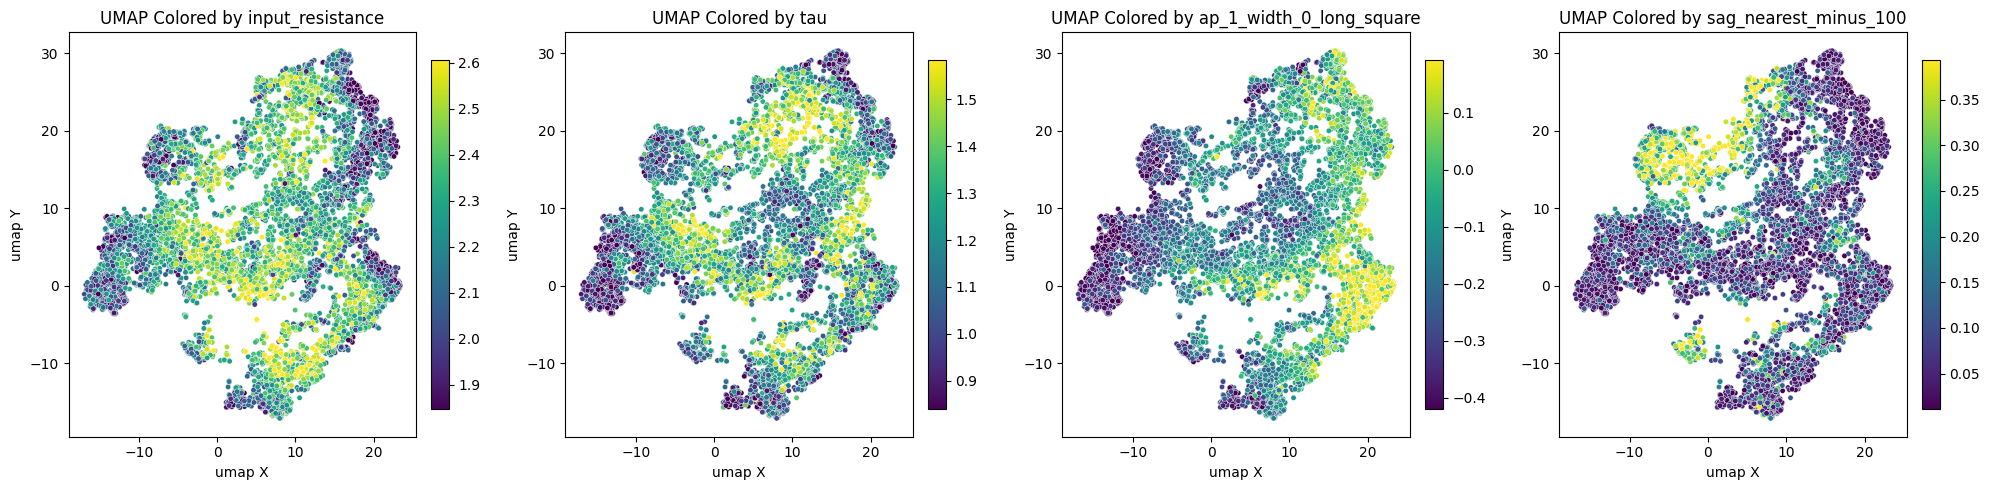

In [ ]:
#run a grid of plots of feature distributions on the UMAP
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, feature in enumerate(selected_features):
    row = 1
    col = i % 4
    #ensure to use viridis palette for continuous features
    #clip the feature to the 5th and 95th percentile for better visualization
    clipped_feature = data[feature].clip(lower=data[feature].quantile(0.05), upper=data[feature].quantile(0.95))
    sns.scatterplot(data=data, x='umap X', y='umap Y', hue=clipped_feature, palette='viridis', s=15, ax=axes[col])
    axes[col].set_title(f'UMAP Colored by {feature}')
    #remove the legend for clarity
    axes[col].legend_.remove()
    #add a colorbar
    norm = plt.Normalize(vmin=clipped_feature.min(), vmax=clipped_feature.max())
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=axes[col], orientation='vertical', fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()
    

Here we can see the umap is clustering feature values together in a somewhat coherent manner. Promisingly (to me) is the mapping -x to +x mapping of action potential width, a common feature for electrophysiological cell 

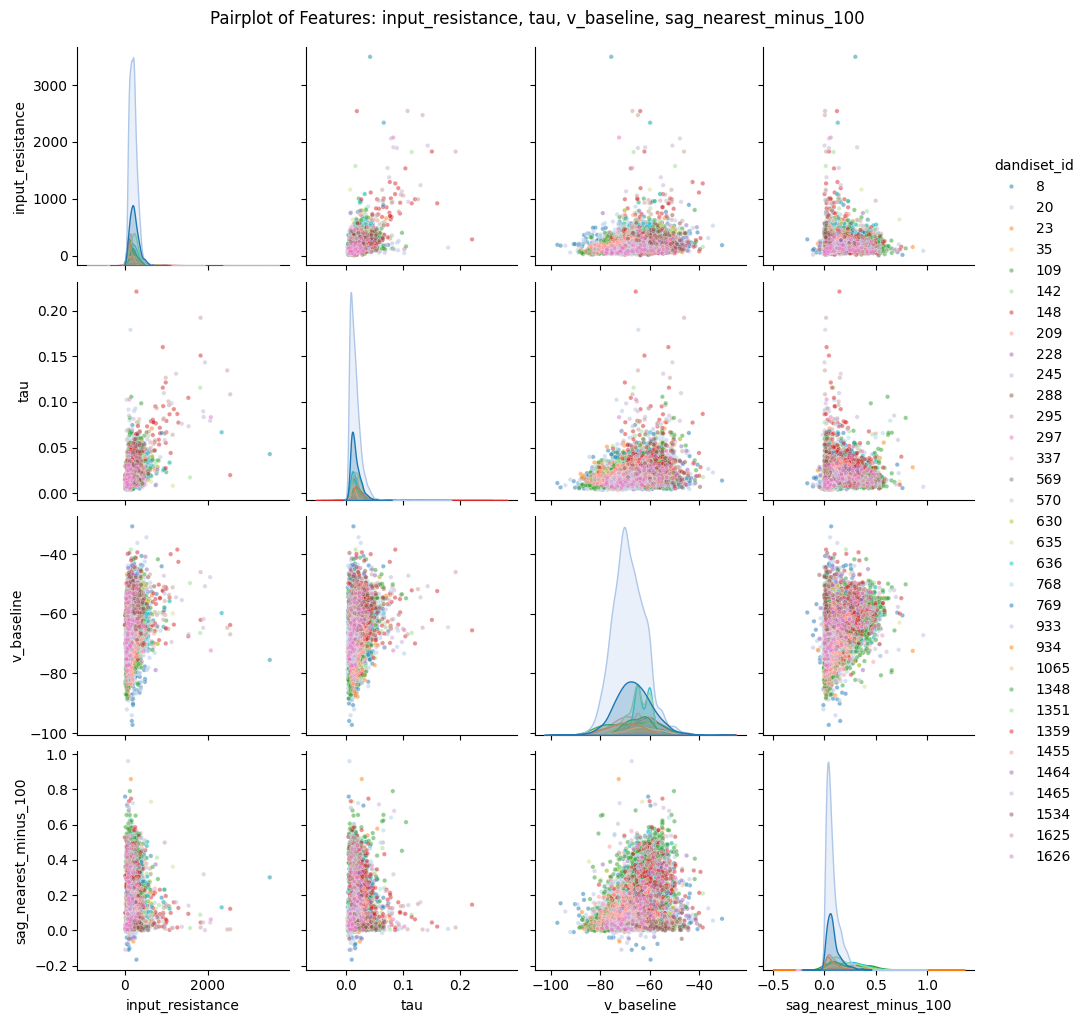

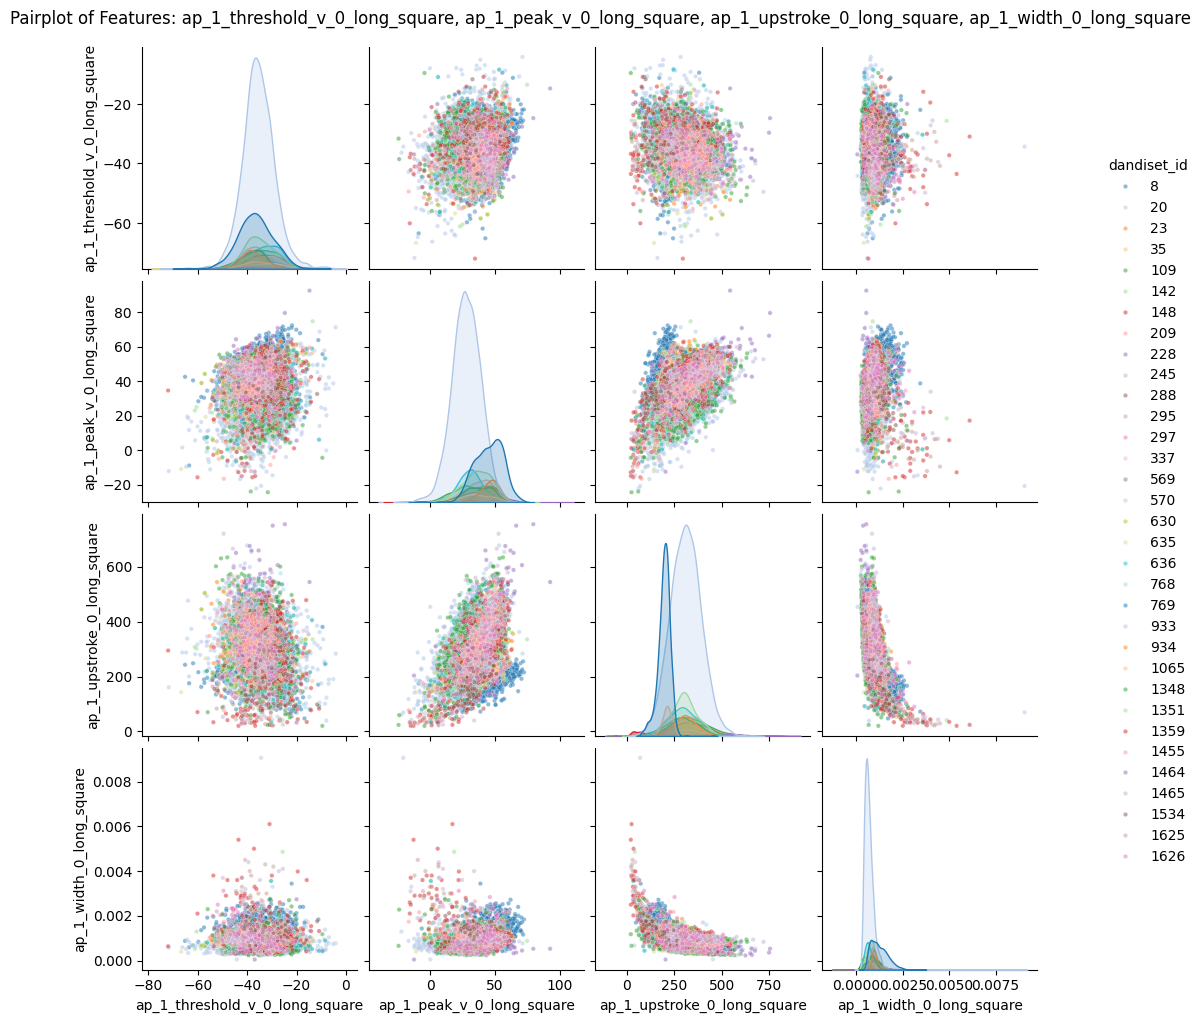

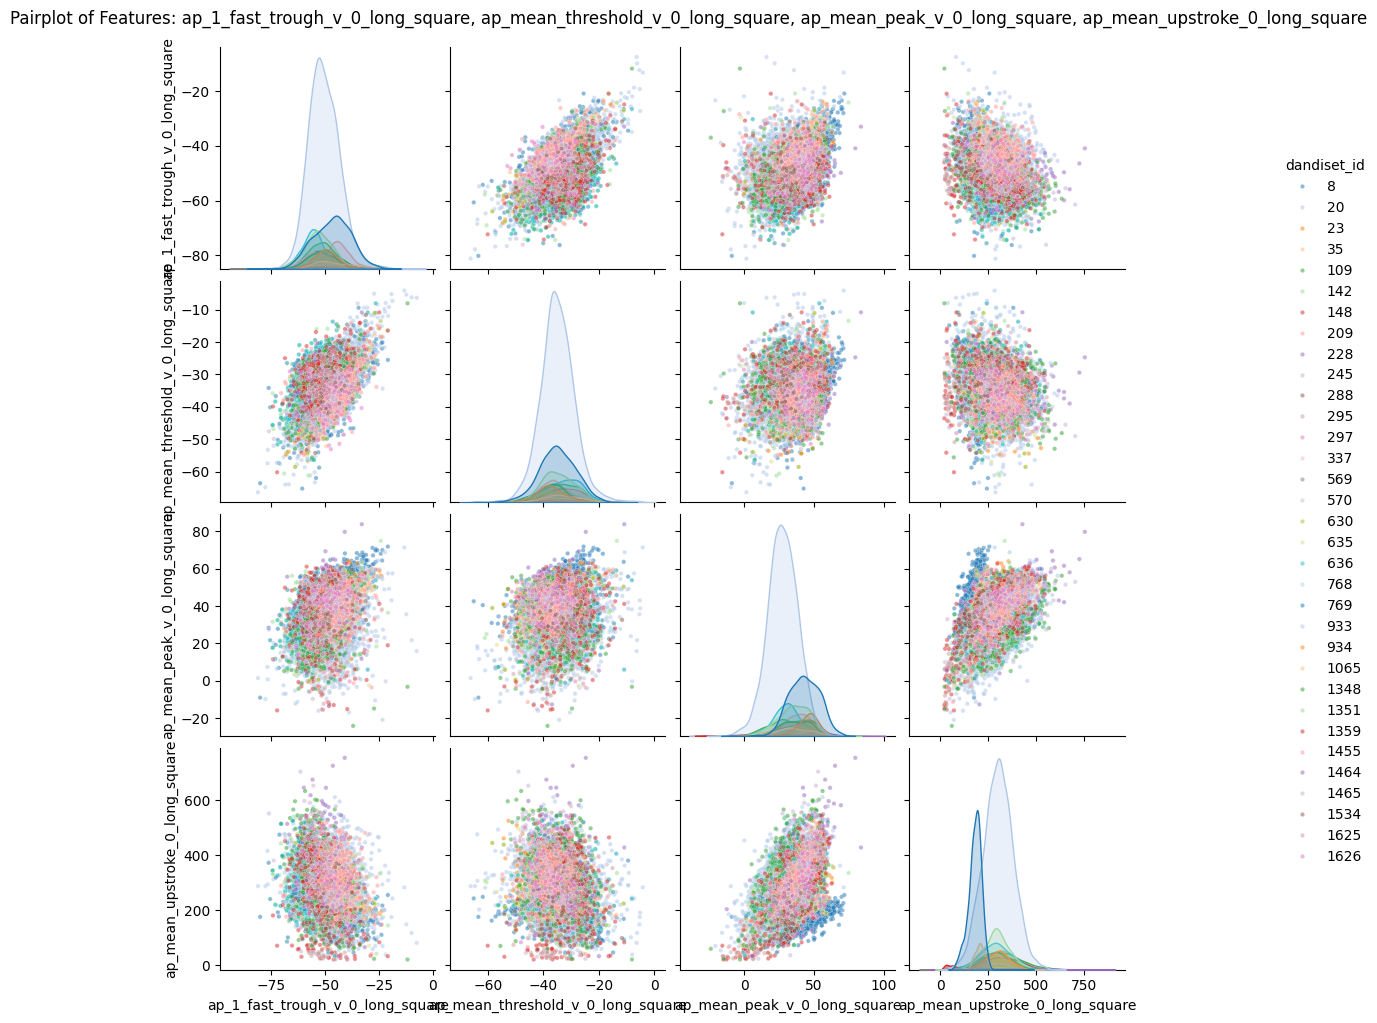

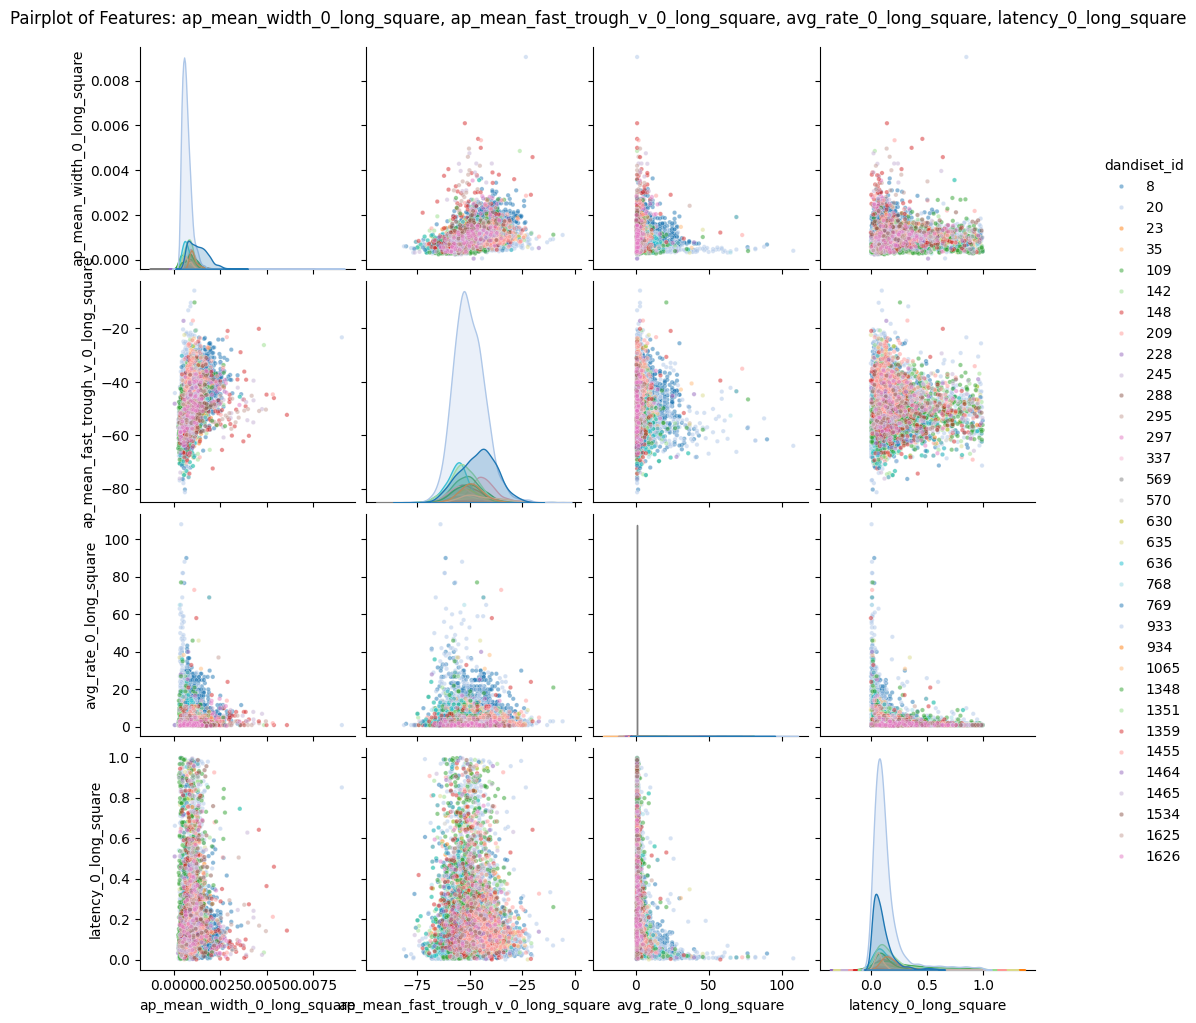

In [ ]:

#run 4 pairplots for some features
for i in range(0, len(features_used), 4):
    subset = features_used[i:i+4]
    sns.pairplot(data, vars=subset, hue='dandiset_id', palette='tab20', diag_kind='kde', plot_kws={'alpha':0.5, 's':10})
    plt.suptitle(f'Pairplot of Features: {", ".join(subset)}', y=1.02)
    plt.show()


## The process

### Part 1: Getting a consistent protocol

The first step in collating the data is finding some common features to analyze. 

In [3]:
##